In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt  

In [18]:
prod = pd.read_csv('remote_work_productivity.csv', sep=',')
prod.head(10)

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
5,6,In-Office,48,66,58
6,7,Remote,38,44,76
7,8,Remote,35,72,90
8,9,Remote,30,70,89
9,10,In-Office,40,59,57


In [20]:
prod.set_index('Employee_ID', inplace=True)
prod.head(10)

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
Employee_ID,,,,
1,Remote,29,75,78
2,In-Office,45,49,47
3,Remote,34,74,89
4,Remote,25,81,84
5,Remote,50,70,74
6,In-Office,48,66,58
7,Remote,38,44,76
8,Remote,35,72,90
9,Remote,30,70,89


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x = prod.iloc[:,1:4].values
y = prod.iloc[:,0].values

print('Type of x: ', type(x))
print('Type of y: ', type(y))

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Type of x:  <class 'numpy.ndarray'>
Type of y:  <class 'numpy.ndarray'>
Shape of x: (1000, 3)
Shape of y: (1000,)


In [26]:
x_train, x_hold, y_train, y_hold = train_test_split(x, y, test_size = 0.20, random_state=1, stratify=y)
x_valid, x_test, y_valid, y_test = train_test_split(x_hold, y_hold, test_size = 0.50, random_state=1, stratify=y_hold)

print('Training features:  ', x_train.shape)
print('Validation features:', x_valid.shape)
print('Testing features:   ', x_test.shape)
print()
print('Training labels:    ', y_train.shape)
print('Validation labels:  ', y_valid.shape)
print('Testing labels:     ', y_test.shape)

Training features:   (800, 3)
Validation features: (100, 3)
Testing features:    (100, 3)

Training labels:     (800,)
Validation labels:   (100,)
Testing labels:      (100,)


In [28]:
_, train_dist = np.unique(y_train, return_counts=True)
_, valid_dist = np.unique(y_valid, return_counts=True)
_, test_dist = np.unique(y_test, return_counts=True)

print('Training label dist:  ', train_dist)
print('Validation label dist:', valid_dist)
print('Test label dist:      ', test_dist)

Training label dist:   [408 392]
Validation label dist: [51 49]
Test label dist:       [51 49]


In [30]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs', penalty=None, multi_class='multinomial')
_ = model_1.fit(x_train, y_train)

In [32]:
x0 = [[40, 75, 90]]

pred_0_m1 = model_1.predict(x0)
print(pred_0_m1)

prob_0_m1 = model_1.predict_proba(x0)
print(np.round(prob_0_m1, 4))

['Remote']
[[0.0867 0.9133]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(max_depth=10, random_state=1)
_ = model_2.fit(x_train, y_train)

In [36]:
pred_0_m2 = model_2.predict(x0)
print(pred_0_m2)

prob_0_m2 = model_2.predict_proba(x0)
print(np.round(prob_0_m2, 4))

['In-Office']
[[0.5 0.5]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
_ = model_3.fit(x_train, y_train)

pred_0_m3 = model_3.predict(x0)
print(pred_0_m3)

prob_0_m3 = model_3.predict_proba(x0)
print(np.round(prob_0_m3, 4))

['Remote']
[[0.3586 0.6414]]


In [40]:
mod1_pred_train = model_1.predict(x_train)
mod1_train_acc = np.mean(mod1_pred_train == y_train)
print(round(mod1_train_acc,4))

0.8462


In [42]:
mod2_pred_train = model_2.predict(x_train)
mod2_train_acc = np.mean(mod2_pred_train == y_train)
print(mod2_train_acc)

0.95


In [44]:
mod3_pred_train = model_3.predict(x_train)
mod3_train_acc = np.mean(mod3_pred_train == y_train)
print(mod3_train_acc)

0.97625


In [46]:
print("Model 1 Training Accuracy:  ", round(model_1.score(x_train, y_train),4))
print("Model 1 Validation Accuracy:", round(model_1.score(x_valid, y_valid),4))
print()
print("Model 2 Training Accuracy:  ", round(model_2.score(x_train, y_train),4))
print("Model 2 Validation Accuracy:", round(model_2.score(x_valid, y_valid),4))
print()
print("Model 3 Training Accuracy:  ", round(model_3.score(x_train, y_train),4))
print("Model 3 Validation Accuracy:", round(model_3.score(x_valid, y_valid),4))

Model 1 Training Accuracy:   0.8462
Model 1 Validation Accuracy: 0.81

Model 2 Training Accuracy:   0.95
Model 2 Validation Accuracy: 0.73

Model 3 Training Accuracy:   0.9762
Model 3 Validation Accuracy: 0.78


In [48]:
print("Model 1 Testing Accuracy:", model_1.score(x_test, y_test))

Model 1 Testing Accuracy: 0.78


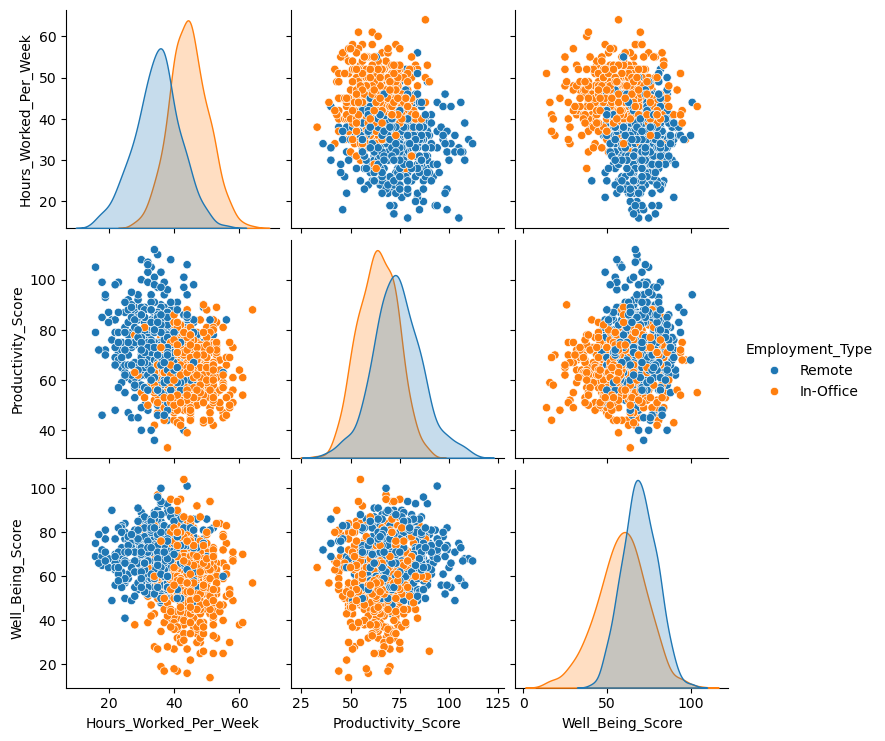

In [50]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.pairplot(prod, hue="Employment_Type")
plt.show()

In [52]:
#Hours worked/week, productivity, well-being

x1 = [[40, 100, 100]]

pred_1_m1 = model_1.predict(x1)
print(pred_0_m1)

prob_1_m1 = model_1.predict_proba(x1)
print(np.round(prob_1_m1, 4))

['Remote']
[[0.0049 0.9951]]


In [54]:
from sklearn.metrics import classification_report, confusion_matrix


### KNeighbors Cosine Similarity model

Optimal number of neighbors:   4
Training Accuracy for Optimal Model:  0.8625
Validation Accuracy for Optimal Model:  0.84


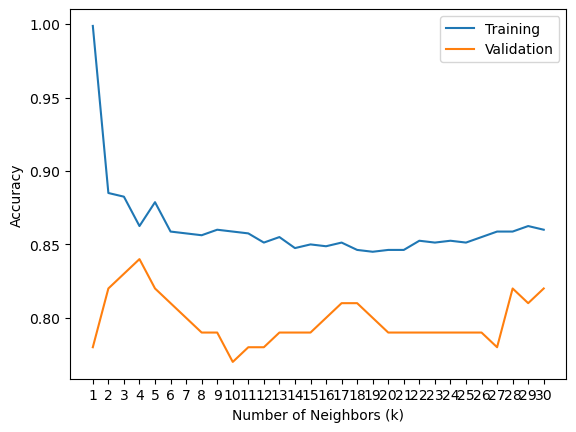

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(x_train_scaled, x_train_scaled)

# Define the range of k values to test
k_range = range(1, 31)

# Initialize lists to store training and validation accuracy
knn_train_acc = []
knn_valid_acc = []

# Loop through the range of k values and evaluate KNN for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(x_train_scaled, y_train)
    
    # Calculate training and validation accuracy
    knn_train_acc.append(knn.score(x_train_scaled, y_train))
    knn_valid_acc.append(knn.score(x_valid_scaled, y_valid))

# Find the optimal number of neighbors based on validation accuracy
knn_opt_k = k_range[np.argmax(knn_valid_acc)]

# Print the optimal number of neighbors and corresponding accuracies
print(f'{"Optimal number of neighbors: ":<30} {knn_opt_k}')
print(f'{"Training Accuracy for Optimal Model: ":<30} {round(knn_train_acc[np.argmax(knn_valid_acc)], 4)}')
print(f'{"Validation Accuracy for Optimal Model: ":<30} {round(knn_valid_acc[np.argmax(knn_valid_acc)], 4)}')

# Plot training and validation accuracy as a function of k
plt.plot(k_range, knn_train_acc, label='Training')
plt.plot(k_range, knn_valid_acc, label='Validation')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend()
plt.show()

In [66]:
#set optimal K Nearest Neighbor model based on optimal neighbors value
opt_knn = KNeighborsClassifier(n_neighbors=4, metric='cosine')

#fit the model
opt_knn.fit(x_train_scaled, y_train)

#print the test score. 
print("KNN Model Testing Accuracy:", opt_knn.score(x_test_scaled, y_test))

KNN Model Testing Accuracy: 0.78


In [68]:
#Hours worked/week, productivity, well-being

pred_1_knn = opt_knn.predict(x1)
print(pred_1_knn)

prob_1_knn = opt_knn.predict_proba(x1)
print(np.round(prob_1_knn, 4))

['In-Office']
[[0.5 0.5]]


Logistic Regression is extremely sure the ideal worker would be remote, KNN is 50/50 and believes In-Office. 
We'll use Random Forest as a tie breaker, in this case. 

In [89]:
# Initialize lists to store training and validation accuracy for Random Forests
rf_train_acc = []
rf_valid_acc = []
depth_range = range(2,10)  # Define the range for max_depth of the tree

# Loop through the depth range and train a Random Forest for each depth
for d in depth_range:
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=1)
    temp_forest.fit(x_train, y_train)
    rf_train_acc.append(temp_forest.score(x_train, y_train))
    rf_valid_acc.append(temp_forest.score(x_valid, y_valid))  

# Find the optimal max_depth based on validation accuracy for Random Forests
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

# Print the optimal max_depth and corresponding training and validation accuracy for Random Forests
print(f'{"Optimal value for max_depth: ":<40} {rf_opt_depth}')
print(f'{"Training Accuracy for Optimal Model: ":<40} {round(rf_train_acc[rf_idx], 4)}')
print(f'{"Validation Accuracy for Optimal Model: ":<40} {round(rf_valid_acc[rf_idx], 4)}')


Optimal value for max_depth:             2
Training Accuracy for Optimal Model:     0.845
Validation Accuracy for Optimal Model:   0.8


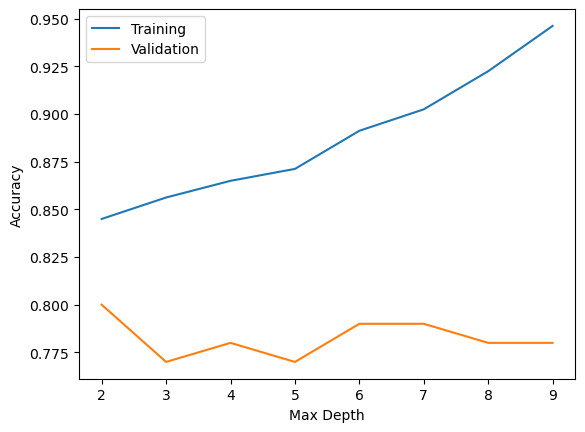

In [97]:
# Plot training and validation accuracy as a function of max_depth for Random Forests
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

In [99]:
#set optimal Random Forest model based on optimal max depth
opt_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)

#fit the model
opt_forest.fit(x_train, y_train)

#print the test score. 
print("Random Forest Model Testing Accuracy:", opt_forest.score(x_test, y_test))

Random Forest Model Testing Accuracy: 0.78


In [101]:
#Hours worked/week, productivity, well-being

pred_1_forest = opt_forest.predict(x1)
print(pred_1_forest)

prob_1_forest = opt_forest.predict_proba(x1)
print(np.round(prob_1_forest, 4))

['Remote']
[[0.3901 0.6099]]
